In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings # To suppress some warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv")
all_col = df.columns
num_col = df.select_dtypes(include=np.number).columns

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df[num_col])
df = sc.fit_transform(df[num_col])

In [4]:
df = pd.DataFrame(df, columns=num_col)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df)

# in the alternative
#pca = PCA().set_output(transform="pandas")
#pca.fit(df)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.95) + 1
#d

In [6]:
from sklearn.cluster import KMeans

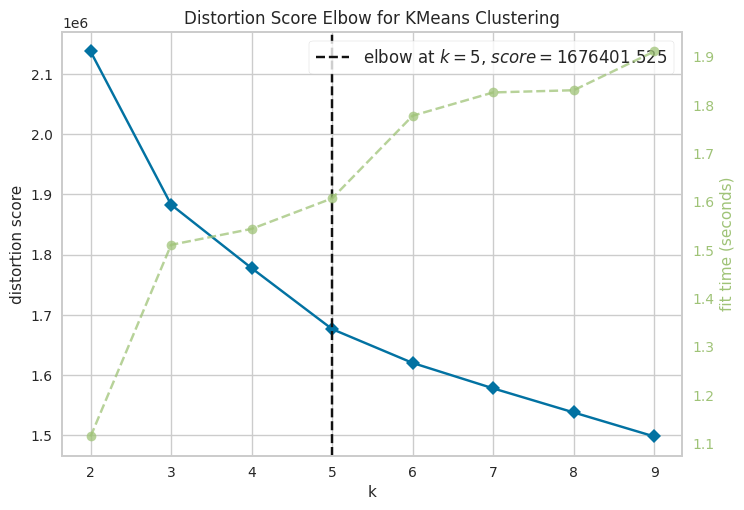

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_reduced)   # Fit the data to the visualizer
visualizer.show()            # Finalize and render the figure

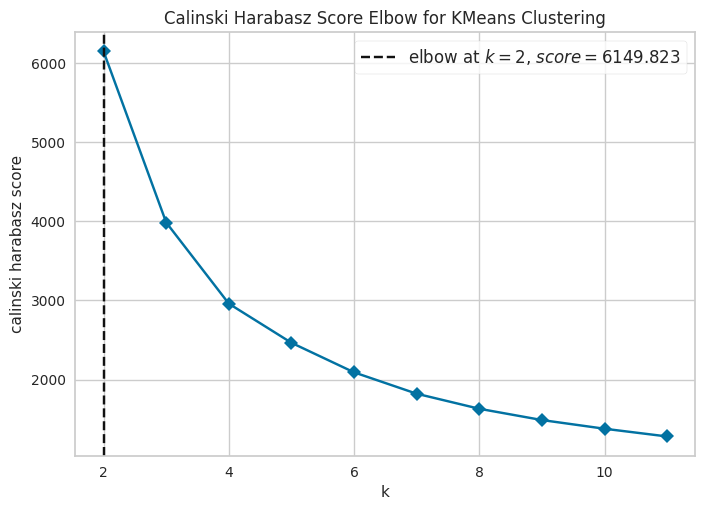

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(df_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

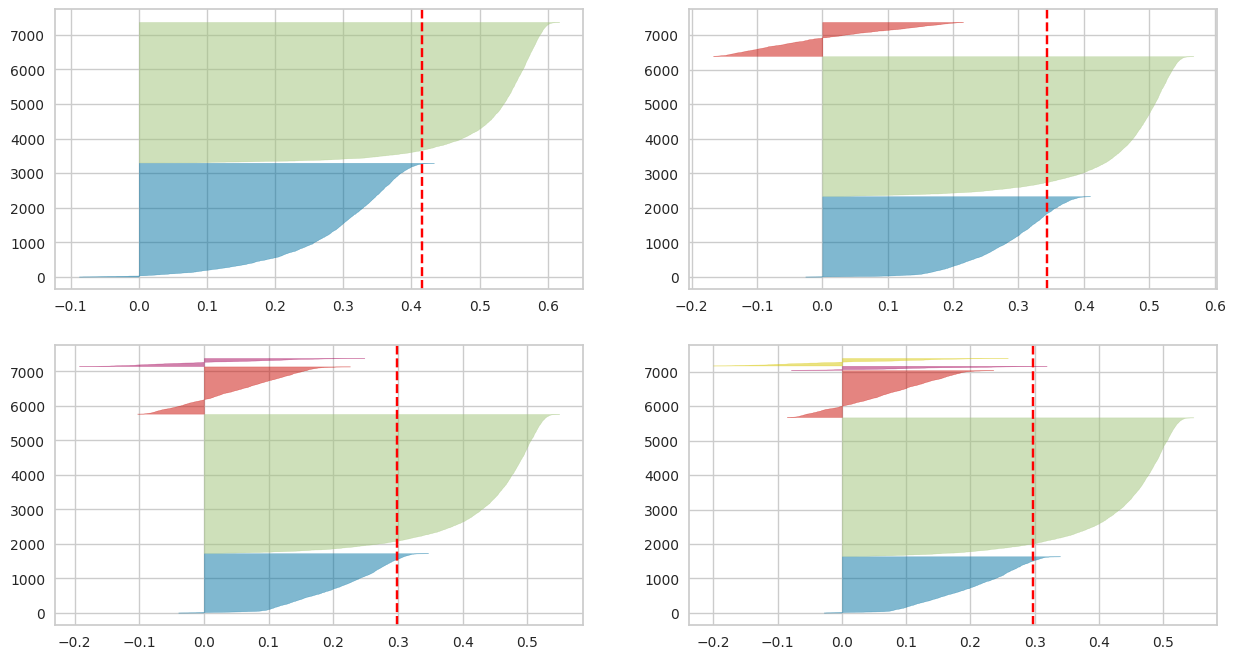

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init="auto", max_iter=200, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_reduced) 

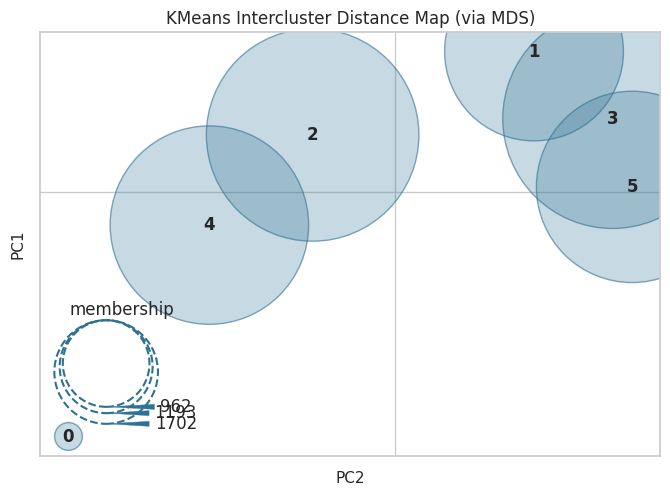

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [10]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(df_reduced)    # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

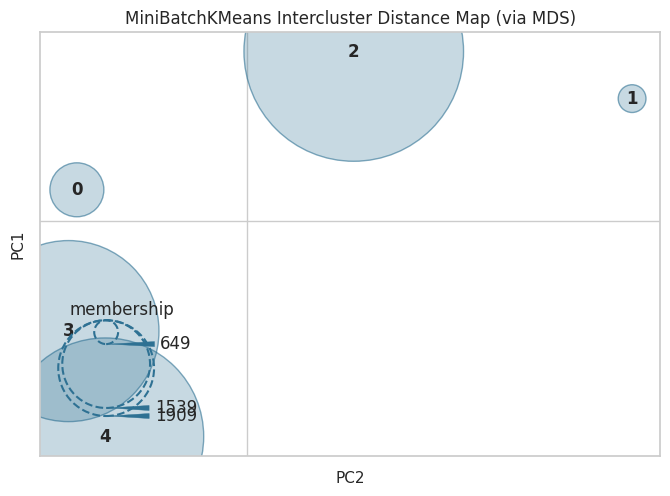

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=777))

In [11]:
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans

intercluster_distance(MiniBatchKMeans(5, random_state=777), df_reduced)

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_reduced)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

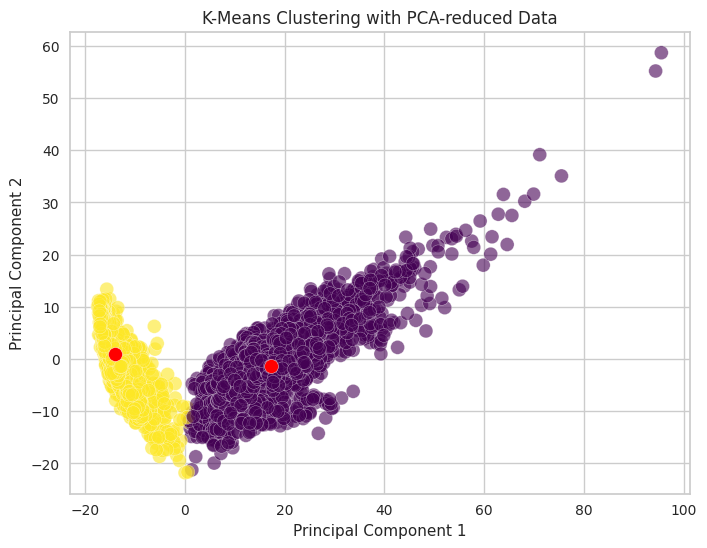

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6, edgecolors='w')
plt.scatter(centroids[:, 0],   centroids[:,1], s=100, color ="red", alpha=1, edgecolors='w')
plt.title('K-Means Clustering with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
centroids[:, 0]

array([ 17.25123256, -13.97256404])

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('viridis') 
colors = cmap(labels / np.max(labels)) 

sc = ax.scatter(df_reduced[:, 0], df_reduced[:, 1], df_reduced[:, 2], 
                c=colors, s=20, alpha=0.5, label='Data Points')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=50, marker='x', label='Centroids')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Plot of Data Points and Centroids')
ax.legend()
plt.show()
